In [166]:
%matplotlib inline
import os
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from os import listdir
from os.path import isfile, join
import seaborn as sns
import pandas as pd
from sklearn import decomposition
from sklearn.manifold import TSNE
import matplotlib.pylab as plt
sns.set_style("whitegrid")


In [2]:
source = "/Users/bobminnich/Documents/Columbia/Courses/DataVisualization/Edav-Text/source"
files = [f for f in listdir(source) if isfile(join(source, f))]
filenames_with_path = []
for i in files:
    filenames_with_path.append(source+ "/" + i)


In [3]:
len(files)

224

In [96]:
raw_texts = []
for fn in filenames_with_path:
    with open(fn) as f:
        text = f.read()
        text = text.replace('_', '')  # remove underscores (italics)
        raw_texts.append(text)

In [190]:
raw_texts = []
raw_texts_out = []


for fn in filenames_with_path:
    check = fn.split("/")[-1].split("_")[0]
    with open(fn) as f:
        begin = 0
        raw_texts = []
        for line in f:
            #print line
            line.replace("000","")
            if begin == 1:
                raw_texts.append((line))
            else:
                if check in line.lower():
                    raw_texts.append("")
                    begin = 1
    raw_texts_out.append(' '.join(raw_texts))
#         text = f.read()
#         text = text.replace('_', '')  # remove underscores (italics)
#         

In [191]:
vectorizer = CountVectorizer(input='content', stop_words="english")

In [192]:
dtm = vectorizer.fit_transform(raw_texts_out)

In [193]:
vocab = np.array(vectorizer.get_feature_names())

In [194]:
dtm = dtm.toarray()

In [195]:
rates = 1000 * dtm / np.sum(dtm, axis=1, keepdims=True)

In [196]:
df = pd.DataFrame(dtm)

In [197]:
df.columns = vocab

In [273]:
toc

,name,MD,year,File
0,George Washington,January 8,1790,1790_December_8.txt
1,George Washington,December 8,1790,1790_January_8.txt
2,George Washington,October 25,1791,1791_October_25.txt
3,George Washington,November 6,1792,1792_November_6.txt
4,George Washington,December 3,1793,1793_December_3.txt
5,George Washington,November 19,1794,1794_November_19.txt
6,George Washington,December 8,1795,1795_December_8.txt
7,George Washington,December 7,1796,1796_December_7.txt
8,John Adams,November 22,1797,1797_November_22.txt
9,John Adams,December 8,1798,1798_December_8.txt


In [346]:
for i in pres_df.name:
    print i

George Washington
John Adams
Thomas Jefferson
James Madison
James Monroe
John Quincy Adams
Andrew Jackson
Martin Van Buren 
William Henry Harrison
John Tyler
James K. Polk
Zachary Taylor
Millard Fillmore
Franklin Pierce
James Buchanan
Abraham Lincoln
Andrew Johnson
Ulysses S. Grant
Rutherford B. Hayes
James A. Garfield
Chester A. Arthur
Grover Cleveland
Benjamin Harrison
Grover Cleveland
William McKinley
Theodore Roosevelt
William H. Taft
Woodrow Wilson
Warren Harding
Calvin Coolidge
Herbert Hoover
Franklin D. Roosevelt
Harry S. Truman
Dwight D. Eisenhower
John F. Kennedy
Lyndon B. Johnson
Richard Nixon
Gerald R. Ford
Jimmy Carter
Ronald Reagan
George H.W. Bush
William J. Clinton
George W. Bush
Barack Obama


In [353]:
pres_df = pd.read_csv("PresidentInfo.csv")
a = list(pres_df.columns)
a[2] = "year"
a[0] = "name"
pres_df.columns = a
pres_df.name = pres_df.name.str.replace("George Bush","George H.W. Bush")
pres_df.name = pres_df.name.str.replace("Bill Clinton","William J. Clinton")
pres_df.name = pres_df.name.str.replace("George Bush","George H.W. Bush")
pres_df.name = pres_df.name.str.replace("William Howard Taft","William H. Taft")
pres_df.name = pres_df.name.str.replace("Warren G. Harding","Warren Harding")
pres_df.name = pres_df.name.str.replace("Franklin Roosevelt","Franklin D. Roosevelt")
pres_df.name = pres_df.name.str.replace("Richard M. Nixon","Richard Nixon")
pres_df.name = pres_df.name.str.replace("Gerald Ford","Gerald R. Ford")
pres_df.name = pres_df.name.str.replace("Martin Van Buren ","Martin van Buren")
pres_df.name = pres_df.name.str.replace("James K. Polk","James Polk")










toc = pd.read_csv("table_of_contents.txt", header=-1)
toc["file"] = files
toc.columns = ["name","speech","MD","year", "File"]
toc = toc.drop("speech",1)
finaldf = pd.merge(toc,pres_df ,how="left",on=["name"])
finaldf = finaldf[finaldf.File.duplicated() == False]
#finaldf.to_csv("President_Info2.csv")

In [354]:
finaldf.columns

Index([u'name', u'MD', u'year_x', u'File', u'Years in office', u'year_y',
       u'Age at inauguration', u'State elected from', u'# of electoral votes',
       u' # of popular votes ', u' National total votes ',
       u'Total electoral votes', u'Rating points', u'Political Party',
       u'Occupation', u'College', u'% electoral', u'% popular'],
      dtype='object')

# Create Color Codes

In [355]:

with pd.option_context('display.max_rows', 999, 'display.max_columns', 10):
    print finaldf.iloc[:,[0,13]]

                      name        Political Party
0        George Washington                   None
1        George Washington                   None
2        George Washington                   None
3        George Washington                   None
4        George Washington                   None
5        George Washington                   None
6        George Washington                   None
7        George Washington                   None
8               John Adams             Federalist
9               John Adams             Federalist
10              John Adams             Federalist
11              John Adams             Federalist
12        Thomas Jefferson  Democratic-Republican
13        Thomas Jefferson  Democratic-Republican
14        Thomas Jefferson  Democratic-Republican
15        Thomas Jefferson  Democratic-Republican
16        Thomas Jefferson  Democratic-Republican
17        Thomas Jefferson  Democratic-Republican
18        Thomas Jefferson  Democratic-Republican


In [356]:
stats_df = finaldf[finaldf.name.duplicated() == False]
stats_df.columns
ratings = stats_df["Rating points"]
ratings = ratings[np.isnan(ratings) == False]
median = np.percentile(ratings,50)
per_75 = np.percentile(ratings,75)
per_25 = np.percentile(ratings,25)



In [357]:
ratings_colors = []
cols = sns.diverging_palette(260, 20, n=4)

In [358]:
sns.light_palette("red")
finaldf["RatingGroup"] = 0
for i in finaldf.index:
    if finaldf["Rating points"][i] <= per_25:
        #ratings_colors.append(cols[0])
        finaldf["RatingGroup"][i] = 0
    elif finaldf["Rating points"][i] <= median:
        #ratings_colors.append(cols[1])
        finaldf["RatingGroup"][i] = 1
    elif finaldf["Rating points"][i] <= per_75:
        #ratings_colors.append(cols[2])
        finaldf["RatingGroup"][i] = 2
    elif finaldf["Rating points"][i] > per_75:
        #ratings_colors.append(cols[3])
        finaldf["RatingGroup"][i] = 3
    else:
        #ratings_colors.append([(0,0,0)])
        finaldf["RatingGroup"][i] = 4



/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

# Create Dimensions

In [359]:
#Dimension Reduction with RF
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 500, n_jobs=-1)

In [360]:
rf.fit(df,toc.name)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [361]:
a = rf.feature_importances_

In [362]:
features = np.argsort(a)[::-1]


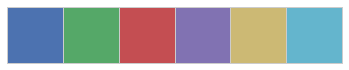

In [363]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

[17304 21894  2934 19498 16829  9835  7995 19729 10196 10908 20354 10443
 21687 13336 15803     1  6091 17014 24084 21720  2274 23965  2275 20628
 16063]
Feature ranking:


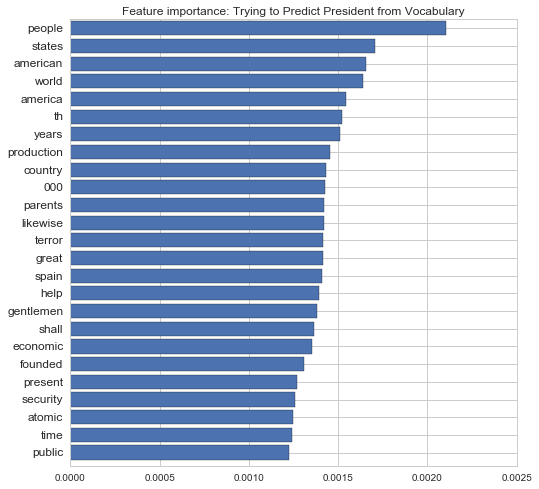

In [364]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax1 = fig.add_subplot(1,1,1)
#ax2 = fig.add_subplot(1,2,2)




importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][0:25]
indices = indices[::-1]
print indices
# Print the feature ranking
print("Feature ranking:")
X = df
# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

ax1.barh(range(len(indices)),importances[indices], align="center", color = current_palette[0])
plt.yticks(range(len(indices)), df.columns[indices], fontsize = 12)

plt.ylim([-0.75,24.5])


#ax2.barh(range(len(indices))[0:24],importances[indices[0:24]],color="r", align="center")
#plt.yticks(range(len(indices))[0:24], df.columns[indices][0:24])


plt.title("Feature importance: Trying to Predict President from Vocabulary")


#plt.ylim([-1, X.shape[1]])
plt.show()


In [365]:
df_rf = df.ix[:,indices]

### TSNE

In [366]:
tsne = TSNE()
tsnew = tsne.fit_transform(df_rf)

### PCA

In [367]:
pca = decomposition.PCA(n_components=2)
new_pca = pca.fit_transform(df_rf)


In [368]:
#LDA
from sklearn.lda import LDA

In [369]:
df_rf.shape

(224, 25)

In [370]:
from sklearn.manifold import MDS

In [371]:
mds = MDS(n_components=2, dissimilarity="euclidean")

In [372]:
mdsnew = mds.fit_transform(df_rf)

In [373]:
parties = np.unique(finaldf["Political Party"])
cols = sns.color_palette("Set3", len(parties))

col_dict = dict(zip(parties,cols))
col_dict

{'Democrat': (0.55294120311737061, 0.82745099067687988, 0.78039216995239258),
 'Democratic-Republican': (0.99649365649503818,
  0.99864667443668143,
  0.7025759500615737),
 'Federalist': (0.74909651630065022, 0.73365630191915177, 0.85250289229785692),
 'National Union': (0.9786851223777322,
  0.50731260145411772,
  0.45665513592607837),
 'None': (0.50772782634286306, 0.69425607358708097, 0.82223761116757121),
 'Republican': (0.99101883944343117, 0.70652827585444733, 0.38442138328271752),
 'Whig': (0.70309882584740135, 0.86994233762516693, 0.41165706024450416)}

In [374]:
for i in finaldf["Political Party"]:
    print i

None
None
None
None
None
None
None
None
Federalist
Federalist
Federalist
Federalist
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democratic-Republican
Democrat
Democrat
Democrat
Democrat
Democrat
Democrat
Democrat
Democrat
Democrat
Democrat
Democrat
Democrat
Whig
Whig
Whig
Whig
Democrat
Democrat
Democrat
Democrat
Whig
Whig
Whig
Whig
Democrat
Democrat
Democrat
Democrat
Democrat
Democrat
Democrat
Democrat
Republican
Republican
Republican
Republican


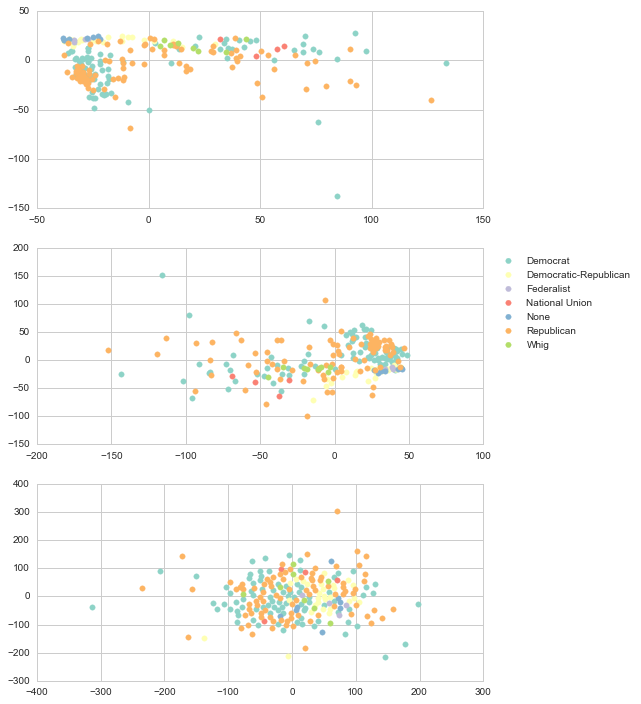

In [375]:
fig = plt.figure()
fig.set_size_inches(8, 12)
ax2 = fig.add_subplot(3,1,1)


x = new_pca[:,0]
y = new_pca[:,1]
#plt.scatter(x,y)
#plt.text(x,y,finaldf.Namea)


plot_df = finaldf
plot_df["x"] = x
plot_df["y"] = y

for i in parties:
    intdf = plot_df[plot_df["Political Party"]==i]
    plt.scatter(intdf.x,intdf.y,color = col_dict[i], s = 30 )
plt.title("PCA")
#plt.legend(parties)

#fig = plt.figure()
#fig.set_size_inches(8, 8)
ax2 = fig.add_subplot(3,1,2)
x = mdsnew[:,0]
y = mdsnew[:,1]
plot_df = finaldf
plot_df["x"] = x
plot_df["y"] = y

for i in parties:
    intdf = plot_df[plot_df["Political Party"]==i]
    ax2.scatter(intdf.x,intdf.y,color = col_dict[i], s = 30 )

plt.legend(parties, bbox_to_anchor=(1.35, 1))

ax3 = fig.add_subplot(3,1,3)



x = tsnew[:,0]
y = tsnew[:,1]
#plt.scatter(x,y)
#plt.text(x,y,finaldf.Namea)


plot_df = finaldf
plot_df["x"] = x
plot_df["y"] = y

for i in parties:
    intdf = plot_df[plot_df["Political Party"]==i]
    ax3.scatter(intdf.x,intdf.y,color = col_dict[i], s = 30 )


# for i, txt in enumerate(files):
#     #plt.annotate(finaldf.Name[i], (x[i],y[i]))
#     plt.scatter(x[i],y[i],color = col_dict[finaldf["Political Party"][i]], s = 80 )

#plt.legend(parties)

0
1
2
3


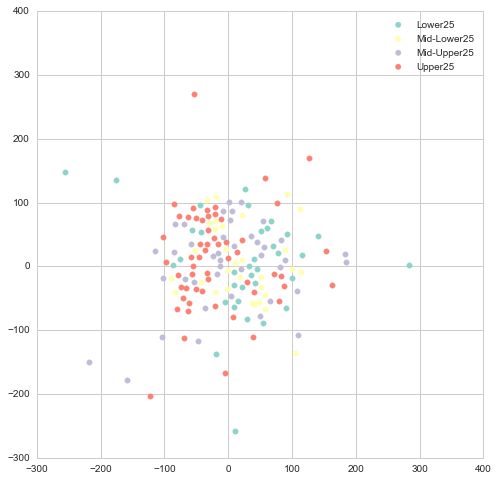

In [246]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax1 = fig.add_subplot(1,1,1)


x = tsnew[:,0]
y = tsnew[:,1]
#plt.scatter(x,y)
#plt.text(x,y,finaldf.Namea)


plot_df = finaldf
plot_df["x"] = x
plot_df["y"] = y

for i in range(4):
    print i
    intdf = plot_df[plot_df["RatingGroup"]==i]
    plt.scatter(intdf.x,intdf.y,color = cols[i], s = 30 )


# for i, txt in enumerate(files):
#     #plt.annotate(finaldf.Name[i], (x[i],y[i]))
#     plt.scatter(x[i],y[i],color = col_dict[finaldf["Political Party"][i]], s = 80 )

plt.legend(["Lower25","Mid-Lower25","Mid-Upper25","Upper25"])

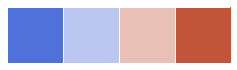

In [421]:
sns.palplot(sns.diverging_palette(260, 20, n=4))

##### 

In [425]:
cols